In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import pixiedust

In [2]:
#Read prediction results and order them alphabetically. Hence they are ordered by aspect.
def create_pred_table(measure):
    path = '/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/function_prediction/'

    first = False
    index=['MF_High_Normal','CC_Low_Specific','BP_High_Shallow','MF_High_Shallow','MF_Middle_Normal','BP_Low_Shallow',
           'CC_Middle_Shallow','CC_Low_Shallow','BP_High_Normal','BP_High_Specific','MF_Middle_Shallow',\
           'CC_High_Normal','CC_Middle_Specific','MF_Middle_Specific','MF_Low_Shallow','BP_Low_Normal',\
           'CC_Middle_Normal','BP_Middle_Shallow','CC_High_Shallow','BP_Middle_Normal','MF_Low_Normal',\
           'BP_Low_Specific','BP_Middle_Specific','MF_Low_Specific','CC_Low_Normal']
    go_pred_table = pd.DataFrame()
    go_pred_table["index_col"] = index

    pd.set_option('display.max_colwidth', -1)
    pd.options.display.max_rows = 4000

    for filename in sorted(glob.glob(os.path.join(path, '*_5cv_mean.tsv'))):
        #print(filename)
        col_name = filename.split("Ontology_based_function_prediction")[-1].split("_")[1]
        tmp_column = pd.read_csv(filename,sep="\t")
        go_pred_table[col_name] = tmp_column[measure]

    #go_pred_table.rename(index=index, inplace=True)
    go_pred_table.set_index('index_col', inplace=True)
    go_pred_table.sort_index(inplace=True)
    return go_pred_table


In [47]:
create_pred_table('F1_Weighted')

/media/DATA/serbulent/anaconda3/envs/embedding_similarity/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,AAC,ALBERT,APAAC,BERT-AVG,BERT-BFD,BLAST,CPC-PROT,ESMB1,GENE2VEC,HMMER,K-SEP,LEARNED-VEC,MUT2VEC,PFAM,PROTVEC,SEQVEC,T5,TCGA-EMBEDDING,UNIREP,XLNET
index_col,,,,,,,,,,,,,,,,,,,,
BP_High_Normal,0.07818,0.46137,0.35640,0.49822,0.40230,0.41761,0.32596,0.58205,0.45495,0.46356,0.47395,0.20665,0.49448,0.39995,0.24969,0.44668,0.49793,0.35498,0.30442,0.42807
BP_High_Shallow,0.34510,0.69418,0.50018,0.68569,0.71325,0.74771,0.55517,0.72064,0.67129,0.73065,0.56170,0.50262,0.53722,0.72912,0.51563,0.69262,0.76613,0.57950,0.62226,0.69349
BP_High_Specific,0.31741,0.87894,0.38837,0.86806,0.82082,0.82035,0.62802,0.84786,0.61038,0.84966,0.78086,0.65148,0.62049,0.79412,0.48407,0.90567,0.90333,0.38895,0.82193,0.80630
BP_Low_Normal,0.30790,0.77539,0.42333,0.65795,0.72293,0.57985,0.47183,0.70628,0.54687,0.61752,0.63781,0.44884,0.49314,0.58740,0.41673,0.76020,0.82773,0.42765,0.61480,0.62537
BP_Low_Shallow,0.37687,0.71154,0.46312,0.61529,0.66161,0.69566,0.53595,0.68348,0.49389,0.67518,0.58493,0.47965,0.53141,0.69090,0.50247,0.68106,0.72400,0.44855,0.62111,0.66426
BP_Low_Specific,0.10283,0.56096,0.21377,0.52408,0.62191,0.48419,0.31763,0.38535,0.40442,0.53291,0.36429,0.34443,0.23704,0.50419,0.21127,0.47182,0.56995,0.45098,0.50174,0.47399
BP_Middle_Normal,0.19621,0.59183,0.47603,0.49206,0.56459,0.49150,0.32859,0.56248,0.41840,0.56979,0.39941,0.34519,0.37143,0.49756,0.31974,0.54363,0.66702,0.24499,0.54503,0.59345
BP_Middle_Shallow,0.34138,0.82605,0.57283,0.80089,0.82337,0.68935,0.52361,0.68228,0.50382,0.79519,0.72519,0.63670,0.46483,0.79611,0.56481,0.75999,0.78706,0.26602,0.77111,0.67413
BP_Middle_Specific,0.37717,0.91479,0.54760,0.85521,0.87619,0.92355,0.63533,0.81686,0.58835,0.91231,0.82433,0.66180,0.55642,0.91300,0.62191,0.91837,0.90851,0.33307,0.75523,0.85675


In [3]:
# Slice dataframe by aspect and order subgroups
def get_go_pred_table_for_aspect(aspect,go_pred_table):
    if aspect == "BP":
        go_pred_tableBP = go_pred_table[0:9]
        new_index =  ["BP_High_Shallow", "BP_High_Normal", "BP_High_Specific",\
                      "BP_Middle_Shallow","BP_Middle_Normal","BP_Middle_Specific",\
                      "BP_Low_Shallow","BP_Low_Normal","BP_Low_Specific"]
        go_pred_tableBP = go_pred_tableBP.reindex(new_index)
        return go_pred_tableBP
    if aspect == "CC":
        go_pred_tableCC = go_pred_table[9:17]
        new_index =  ["CC_High_Shallow", "CC_High_Normal",\
                      "CC_Middle_Shallow","CC_Middle_Normal","CC_Middle_Specific",\
                      "CC_Low_Shallow","CC_Low_Normal","CC_Low_Specific"]
        go_pred_tableCC = go_pred_tableCC.reindex(new_index)
        return go_pred_tableCC
    if aspect == "MF":
        go_pred_tableMF = go_pred_table[17:25]
        new_index =  ["MF_High_Shallow", "MF_High_Normal",\
                      "MF_Middle_Shallow","MF_Middle_Normal","MF_Middle_Specific",\
                      "MF_Low_Shallow","MF_Low_Normal","MF_Low_Specific"]
        go_pred_tableMF = go_pred_tableMF.reindex(new_index)
        return go_pred_tableMF


In [4]:
#draw a grouped bar chart for results
def drawBenchmarks(dataset,embedding_lables,title):
    cols = ["Accuracy","F1_Weighted"]
    colors=['peachpuff', 'palegreen','lightskyblue', 'orange']
    edgecolor="violet"
    bar_width = .8

    ax = dataset[cols].plot.bar(width=bar_width\
                                  , ylim=[-0.2, 1], color=colors,figsize=(12,8),edgecolor=edgecolor)

    #get first 4 label
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(labels[0:4])
    ax.set_title('Prediction Benchmark for ' + title )
    ax.set_xticklabels(embedding_lables)
    ax.set_xlabel('')

In [5]:
#Calculate mean measures for different aspects also return F1 weigted scores
def prepare_figure_data_for_aspect(aspect):
    go_pred_tableF1 = create_pred_table("F1_Weighted")
    go_pred_tableACC = create_pred_table("Accuracy")
    go_pred_tablePR = create_pred_table("Precision_Weighted")
    go_pred_tableREC = create_pred_table("Recall_Weighted")
    go_pred_tableHAMM = create_pred_table("Hamming_Distance")

    go_pred_tableF1_aspect = get_go_pred_table_for_aspect(aspect,go_pred_tableF1)
    go_pred_tableACC_aspect = get_go_pred_table_for_aspect(aspect,go_pred_tableACC)
    go_pred_tablePR_aspect = get_go_pred_table_for_aspect(aspect,go_pred_tablePR)
    go_pred_tableREC_aspect = get_go_pred_table_for_aspect(aspect,go_pred_tableREC)
    go_pred_tableHAMM_aspect = get_go_pred_table_for_aspect(aspect,go_pred_tableHAMM)

    go_pred_tableF1_aspect_mean = go_pred_tableF1_aspect.mean(axis = 0)
    go_pred_tableACC_aspect_mean = go_pred_tableACC_aspect.mean(axis = 0) 
    go_pred_tablePR_aspect_mean = go_pred_tablePR_aspect.mean(axis = 0) 
    go_pred_tableREC_aspect_mean = go_pred_tableREC_aspect.mean(axis = 0)
    go_pred_tableHAMM_aspect_mean = go_pred_tableHAMM_aspect.mean(axis = 0)

    new_index =  ["Accuracy","F1-Weighted","Precision","Recall", "Hamming"]
    pred_mean_df = pd.DataFrame([go_pred_tableACC_aspect_mean])
    pred_mean_df = pred_mean_df.append(go_pred_tableF1_aspect_mean, ignore_index=True)
    pred_mean_df = pred_mean_df.append(go_pred_tablePR_aspect_mean, ignore_index=True)
    pred_mean_df = pred_mean_df.append(go_pred_tableREC_aspect_mean, ignore_index=True)
    pred_mean_df = pred_mean_df.append(go_pred_tableHAMM_aspect_mean, ignore_index=True)
    pred_mean_df = pred_mean_df.set_index(pd.Series(new_index))
    
    display_labels = ['BLAST','HMMER','K-SEP','APAAC','PFAM','AAC','PROTVEC',\
    'GENE2VEC','LEARNED-VEC','MUT2VEC','TCGA-EMBEDDING','SEQVEC','CPC-PROT','BERT-BFD',\
    'BERT-AVG','ESMB1','ALBERT','XLNET','UNIREP','T5']
    
    columnsTitles = ['BLAST','HMMER','K-SEP','APAAC','PFAM','AAC','PROTVEC',\
    'GENE2VEC','LEARNED-VEC','MUT2VEC','TCGA-EMBEDDING','SEQVEC','CPC-PROT','BERT-BFD',\
    'BERT-AVG','ESMB1','ALBERT','XLNET','UNIREP','T5']
    
    pred_mean_df = pred_mean_df.reindex(columns=columnsTitles)
    go_pred_tableF1_aspect = go_pred_tableF1_aspect.reindex(columns=columnsTitles)
    
    pred_mean_df.columns = display_labels
    go_pred_tableF1_aspect.columns = display_labels
    
    return pred_mean_df,go_pred_tableF1_aspect

In [6]:
#Create dataframes for figures
pred_mean_df_BP, go_pred_tableF1_BP = prepare_figure_data_for_aspect("BP")
pred_mean_df_CC, go_pred_tableF1_CC = prepare_figure_data_for_aspect("CC")
pred_mean_df_MF, go_pred_tableF1_MF = prepare_figure_data_for_aspect("MF")

/media/DATA/serbulent/anaconda3/envs/embedding_similarity/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [7]:
go_pred_tableF1_BP.index.isin(['BP_High_Shallow'])

array([ True, False, False, False, False, False, False, False, False])

In [8]:
pred_mean_df_BP.round(3).to_csv("pred_mean_df_BP.csv")
pred_mean_df_BP

,BLAST,HMMER,K-SEP,APAAC,PFAM,AAC,PROTVEC,GENE2VEC,LEARNED-VEC,MUT2VEC,TCGA-EMBEDDING,SEQVEC,CPC-PROT,BERT-BFD,BERT-AVG,ESMB1,ALBERT,XLNET,UNIREP,T5
Accuracy,0.581750,0.610847,0.467118,0.288302,0.582538,0.261082,0.301606,0.397671,0.375382,0.375447,0.316548,0.605547,0.348471,0.590943,0.582507,0.549454,0.614986,0.509273,0.496361,0.674259
F1-Weighted,0.649974,0.682974,0.594719,0.437959,0.656928,0.271450,0.431813,0.521374,0.475262,0.478496,0.388299,0.686671,0.480232,0.689663,0.666383,0.665253,0.712783,0.646201,0.617514,0.739073
Precision,0.770792,0.732094,0.655057,0.511770,0.781724,0.329364,0.489759,0.570313,0.518591,0.540959,0.461241,0.756730,0.535007,0.744986,0.737672,0.748426,0.789438,0.712899,0.662233,0.802483
Recall,0.609802,0.679277,0.616294,0.480771,0.610459,0.320697,0.467864,0.519906,0.492639,0.471368,0.412133,0.670693,0.506973,0.686774,0.659742,0.671741,0.691623,0.657447,0.638897,0.724737
Hamming,0.109282,0.125980,0.167619,0.234774,0.107216,0.233620,0.237966,0.185638,0.196327,0.192464,0.233178,0.116541,0.201632,0.124073,0.128376,0.129916,0.107327,0.146169,0.150903,0.090913


In [9]:
pred_mean_df_CC.round(3).to_csv("pred_mean_df_CC.csv")
pred_mean_df_CC

,BLAST,HMMER,K-SEP,APAAC,PFAM,AAC,PROTVEC,GENE2VEC,LEARNED-VEC,MUT2VEC,TCGA-EMBEDDING,SEQVEC,CPC-PROT,BERT-BFD,BERT-AVG,ESMB1,ALBERT,XLNET,UNIREP,T5
Accuracy,0.603438,0.621322,0.440350,0.311336,0.613595,0.199659,0.304975,0.357678,0.365900,0.371432,0.248015,0.598610,0.334265,0.549479,0.501308,0.544698,0.635399,0.515305,0.480857,0.652586
F1-Weighted,0.687387,0.714833,0.607687,0.427769,0.684566,0.218974,0.460949,0.472619,0.460051,0.478213,0.322536,0.696812,0.467429,0.679817,0.632271,0.658784,0.730765,0.634416,0.582792,0.733710
Precision,0.769268,0.735701,0.651265,0.490242,0.767760,0.351115,0.526470,0.546325,0.538774,0.548770,0.442078,0.744058,0.580645,0.766536,0.707820,0.743228,0.788077,0.710182,0.701359,0.779781
Recall,0.639841,0.708888,0.660776,0.490074,0.650452,0.232743,0.528526,0.449005,0.449332,0.474089,0.312112,0.680347,0.473771,0.654125,0.635829,0.668429,0.710784,0.649879,0.597278,0.711695
Hamming,0.111558,0.125536,0.202156,0.255735,0.127344,0.236391,0.252776,0.209986,0.197381,0.199344,0.240899,0.136411,0.218973,0.135986,0.171517,0.151921,0.114202,0.163265,0.176881,0.110874


In [10]:
pred_mean_df_MF.round(3).to_csv("pred_mean_df_MF.csv")
pred_mean_df_MF

,BLAST,HMMER,K-SEP,APAAC,PFAM,AAC,PROTVEC,GENE2VEC,LEARNED-VEC,MUT2VEC,TCGA-EMBEDDING,SEQVEC,CPC-PROT,BERT-BFD,BERT-AVG,ESMB1,ALBERT,XLNET,UNIREP,T5
Accuracy,0.588580,0.605416,0.489297,0.326834,0.588788,0.315315,0.385503,0.363470,0.458707,0.423634,0.306159,0.622645,0.415857,0.606126,0.532780,0.538124,0.595210,0.489319,0.513883,0.674333
F1-Weighted,0.654841,0.690704,0.616064,0.445386,0.648341,0.328167,0.478436,0.466956,0.530379,0.498721,0.356947,0.698189,0.526871,0.702608,0.647801,0.634893,0.692061,0.604266,0.617591,0.754270
Precision,0.748254,0.722575,0.709008,0.536810,0.751154,0.410738,0.516785,0.508759,0.604910,0.552664,0.409508,0.722653,0.615022,0.749175,0.671029,0.702776,0.757310,0.690785,0.672546,0.797628
Recall,0.625773,0.680872,0.615177,0.488766,0.621394,0.353704,0.509184,0.467710,0.536109,0.498731,0.378079,0.698908,0.553007,0.700430,0.672297,0.659845,0.673759,0.607187,0.632801,0.737244
Hamming,0.122036,0.130357,0.167318,0.226782,0.124122,0.214949,0.214048,0.225320,0.179854,0.198758,0.228631,0.119000,0.201365,0.121310,0.150406,0.142575,0.127798,0.151989,0.155956,0.100167


In [11]:
def get_category_based_average_results(tables):
    categories = {}

    categories["Low"] = ["BP_Low_Shallow","BP_Low_Normal","BP_Low_Specific","CC_Low_Shallow",\
                   "CC_Low_Normal","CC_Low_Specific","MF_Low_Shallow","MF_Low_Normal","MF_Low_Specific" ]
    categories["Middle"] = ["BP_Middle_Shallow","BP_Middle_Normal","BP_Middle_Specific","CC_Middle_Shallow",\
                   "CC_Middle_Normal","CC_Middle_Specific","MF_Middle_Shallow","MF_Middle_Normal","MF_Middle_Specific" ]
    categories["High"] = ["BP_High_Shallow","BP_High_Normal","BP_High_Specific","CC_High_Shallow",\
                   "CC_High_Normal","MF_High_Shallow","MF_High_Normal"]
    
    categories["Specific"] = ["BP_High_Specific","BP_Middle_Specific","BP_Low_Specific","CC_Middle_Specific",\
                        "CC_Low_Specific","MF_Middle_Specific","MF_Low_Specific"]
    categories["Normal"] = ["BP_High_Normal","BP_Middle_Normal","BP_Low_Normal","CC_High_Normal","CC_Middle_Normal",\
                        "CC_Low_Normal","MF_High_Normal","MF_Middle_Normal","MF_Low_Normal"] 
    categories["Shallow"] = ["BP_High_Shallow","BP_Middle_Shallow","BP_Low_Shallow","CC_High_Shallow","CC_Middle_Shallow",\
                        "CC_Low_Shallow","MF_High_Shallow","MF_Middle_Shallow","MF_Low_Shallow"]
    
    '''search_list = []
    if result_type == "low":
        search_list = low_results
    if result_type == "specific":
        search_list = specific_results'''
    averaged_aspect_tables = {}
    for table_aspect in list(tables.keys()):
        averaged_category_sr_list = []
        for category in list(categories.keys()):
            category_list = categories[category]
            category_elements = [category_element for category_element in category_list\
                                 if table_aspect in category_element]
            #print(category_elements)
            
            df = tables[table_aspect]
            averaged_category_sr = df[df.index.isin(category_elements)].mean(axis = 0)#.to_frame()
            #print(averaged_category_sr)
            averaged_category_sr_list.append(averaged_category_sr)
        result = pd.concat(averaged_category_sr_list,axis=1,keys=list(categories.keys()))
        result['Average'] = result.mean(axis=1)
        result = result.sort_values(by='Average', ascending=False)
        averaged_aspect_tables[table_aspect] = result
    
    return averaged_aspect_tables

In [12]:
tables = {}
tables["MF"] = go_pred_tableF1_MF
tables["BP"] = go_pred_tableF1_BP
tables["CC"] = go_pred_tableF1_CC

In [13]:
go_pred_tableF1_MF.mean(axis=0).sort_values()

AAC               0.328167
TCGA-EMBEDDING    0.356947
APAAC             0.445386
GENE2VEC          0.466956
PROTVEC           0.478436
MUT2VEC           0.498721
CPC-PROT          0.526871
LEARNED-VEC       0.530379
XLNET             0.604266
K-SEP             0.616064
UNIREP            0.617591
ESMB1             0.634893
BERT-AVG          0.647801
PFAM              0.648341
BLAST             0.654841
HMMER             0.690704
ALBERT            0.692061
SEQVEC            0.698189
BERT-BFD          0.702608
T5                0.754270
dtype: float64

In [14]:
go_pred_tableF1_BP.mean(axis=0).sort_values()

AAC               0.271450
TCGA-EMBEDDING    0.388299
PROTVEC           0.431813
APAAC             0.437959
LEARNED-VEC       0.475262
MUT2VEC           0.478496
CPC-PROT          0.480232
GENE2VEC          0.521374
K-SEP             0.594719
UNIREP            0.617514
XLNET             0.646201
BLAST             0.649974
PFAM              0.656928
ESMB1             0.665253
BERT-AVG          0.666383
HMMER             0.682974
SEQVEC            0.686671
BERT-BFD          0.689663
ALBERT            0.712783
T5                0.739073
dtype: float64

In [15]:
go_pred_tableF1_CC.mean(axis=0).sort_values()

AAC               0.218974
TCGA-EMBEDDING    0.322536
APAAC             0.427769
LEARNED-VEC       0.460051
PROTVEC           0.460949
CPC-PROT          0.467429
GENE2VEC          0.472619
MUT2VEC           0.478213
UNIREP            0.582792
K-SEP             0.607687
BERT-AVG          0.632271
XLNET             0.634416
ESMB1             0.658784
BERT-BFD          0.679817
PFAM              0.684566
BLAST             0.687387
SEQVEC            0.696812
HMMER             0.714833
ALBERT            0.730765
T5                0.733710
dtype: float64

In [16]:
cat_based_avg_dict = get_category_based_average_results(tables)
for table_aspect in list(tables.keys()):
    cat_based_avg_dict[table_aspect].to_csv("category_based_average_"+table_aspect+".csv")

In [17]:
cat_based_avg_dict

{'MF':                      Low    Middle      High  Specific    Normal   Shallow  \
 T5              0.663307  0.810887  0.805790  0.766130  0.744473  0.756160   
 BERT-BFD        0.601123  0.778967  0.740295  0.713425  0.701373  0.696630   
 SEQVEC          0.574943  0.772893  0.771000  0.738000  0.673840  0.695997   
 ALBERT          0.583393  0.737947  0.786235  0.742585  0.654233  0.696207   
 HMMER           0.567013  0.765727  0.763705  0.728145  0.646437  0.710010   
 BLAST           0.510450  0.715620  0.780260  0.727110  0.603943  0.657560   
 PFAM            0.496853  0.708617  0.785160  0.708475  0.619657  0.636937   
 BERT-AVG        0.495390  0.776340  0.683610  0.644480  0.695163  0.602653   
 ESMB1           0.533267  0.714080  0.668550  0.719120  0.604717  0.608917   
 UNIREP          0.493390  0.731090  0.633645  0.615270  0.632053  0.604677   
 K-SEP           0.508567  0.727453  0.610225  0.580660  0.613973  0.641757   
 XLNET           0.478940  0.689040  0.665095 

In [18]:
go_pred_tableF1_MF

,BLAST,HMMER,K-SEP,APAAC,PFAM,AAC,PROTVEC,GENE2VEC,LEARNED-VEC,MUT2VEC,TCGA-EMBEDDING,SEQVEC,CPC-PROT,BERT-BFD,BERT-AVG,ESMB1,ALBERT,XLNET,UNIREP,T5
index_col,,,,,,,,,,,,,,,,,,,,
MF_High_Shallow,0.71088,0.68176,0.52953,0.35915,0.71437,0.28943,0.40241,0.49349,0.44249,0.46721,0.32195,0.68429,0.46389,0.64618,0.57133,0.55094,0.70054,0.53005,0.52942,0.72427
MF_High_Normal,0.84964,0.84565,0.69092,0.41431,0.85595,0.26868,0.58882,0.24096,0.59010,0.52797,0.00000,0.85771,0.61797,0.83441,0.79589,0.78616,0.87193,0.80014,0.73787,0.88731
MF_Middle_Shallow,0.90370,0.91649,0.88485,0.82855,0.90977,0.83960,0.83729,0.65908,0.83384,0.75805,0.60280,0.94021,0.86338,0.92685,0.90155,0.91981,0.93586,0.88782,0.91750,0.94421
MF_Middle_Normal,0.50695,0.62244,0.66424,0.45563,0.51232,0.20470,0.62246,0.45392,0.61188,0.49871,0.45602,0.62183,0.48917,0.69544,0.76826,0.52285,0.53571,0.52389,0.65117,0.70929
MF_Middle_Specific,0.73621,0.75825,0.63327,0.43351,0.70376,0.22577,0.44714,0.51125,0.47570,0.49694,0.37089,0.75664,0.49700,0.71461,0.65921,0.69958,0.74227,0.65541,0.62460,0.77916
MF_Low_Shallow,0.35810,0.53178,0.51089,0.31064,0.28667,0.17905,0.15968,0.35333,0.41305,0.25087,0.31278,0.46349,0.35609,0.51686,0.33508,0.35600,0.45222,0.26571,0.36711,0.60000
MF_Low_Normal,0.45524,0.47122,0.48676,0.34141,0.49070,0.13916,0.27872,0.47379,0.36177,0.44251,0.29886,0.54198,0.36785,0.57427,0.52134,0.50514,0.55506,0.51790,0.50712,0.63682
MF_Low_Specific,0.71801,0.69804,0.52805,0.41989,0.71319,0.47895,0.49097,0.54983,0.51420,0.54751,0.49228,0.71936,0.55962,0.71224,0.62975,0.73866,0.74290,0.65321,0.60594,0.75310


In [19]:
go_pred_tableF1_MF.mean(axis=0)

BLAST             0.654841
HMMER             0.690704
K-SEP             0.616064
APAAC             0.445386
PFAM              0.648341
AAC               0.328167
PROTVEC           0.478436
GENE2VEC          0.466956
LEARNED-VEC       0.530379
MUT2VEC           0.498721
TCGA-EMBEDDING    0.356947
SEQVEC            0.698189
CPC-PROT          0.526871
BERT-BFD          0.702608
BERT-AVG          0.647801
ESMB1             0.634893
ALBERT            0.692061
XLNET             0.604266
UNIREP            0.617591
T5                0.754270
dtype: float64

In [45]:
#Classic Representations: Yellow
#Learned Small Scale Models: Blue
#Learned Large Scale Models: Red
group_color_dict = {'K-SEP':'green','BERT-AVG':'red', 'UNIREP':'red', 'T5':'red', 'BERT-BFD':'red',\
 'HMMER':'green', 'SEQVEC':'red', 'ALBERT':'red', 'BLAST':'green', 'PFAM':'green', 'ESMB1':'red', \
 'XLNET':'red', 'AAC':'green', 'APAAC':'green', 'PROTVEC':'blue', 'MUT2VEC':'blue',\
'LEARNED-VEC':'blue', 'CPC-PROT':'blue', 'GENE2VEC':'blue', 'TCGA-EMBEDDING':'blue'}

def set_colors_and_marks_for_representation_groups(ax):
    for label in ax.get_xticklabels():
        label.set_color(group_color_dict[label.get_text()])
        if label.get_text() == 'PFAM' or label.get_text() == 'MUT2VEC':
            signed_text = "^" + label.get_text()
            label.set_text(signed_text)
    fontproperties = {'weight' : 'bold'}
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties)

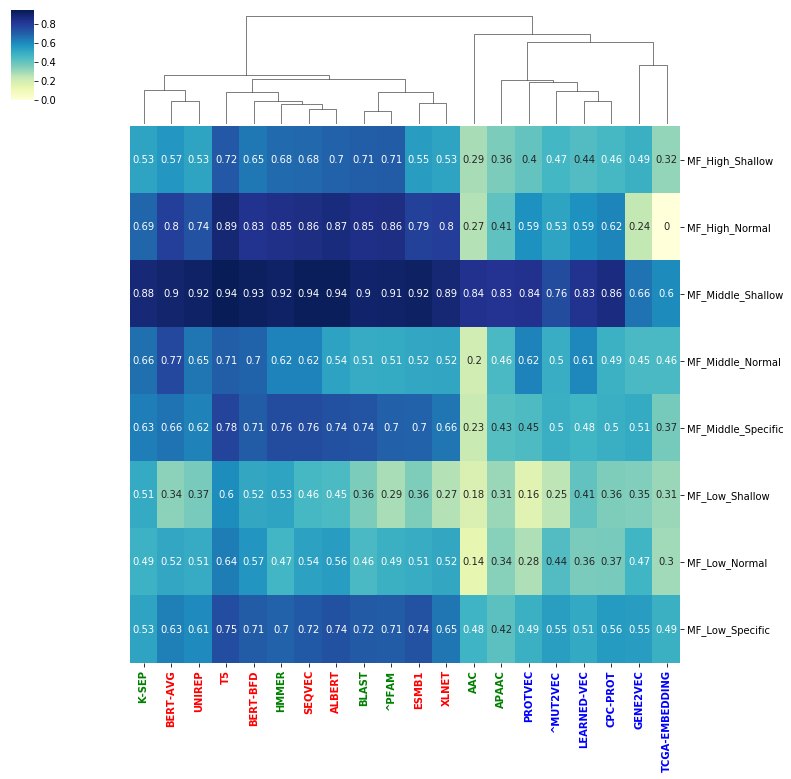

In [46]:
g = sns.clustermap(go_pred_tableF1_MF, annot=True, cmap="YlGnBu", row_cluster=False,figsize=(12, 12))
ax = g.ax_heatmap
ax.set_xlabel("")
ax.set_ylabel("")
set_colors_and_marks_for_representation_groups(ax)

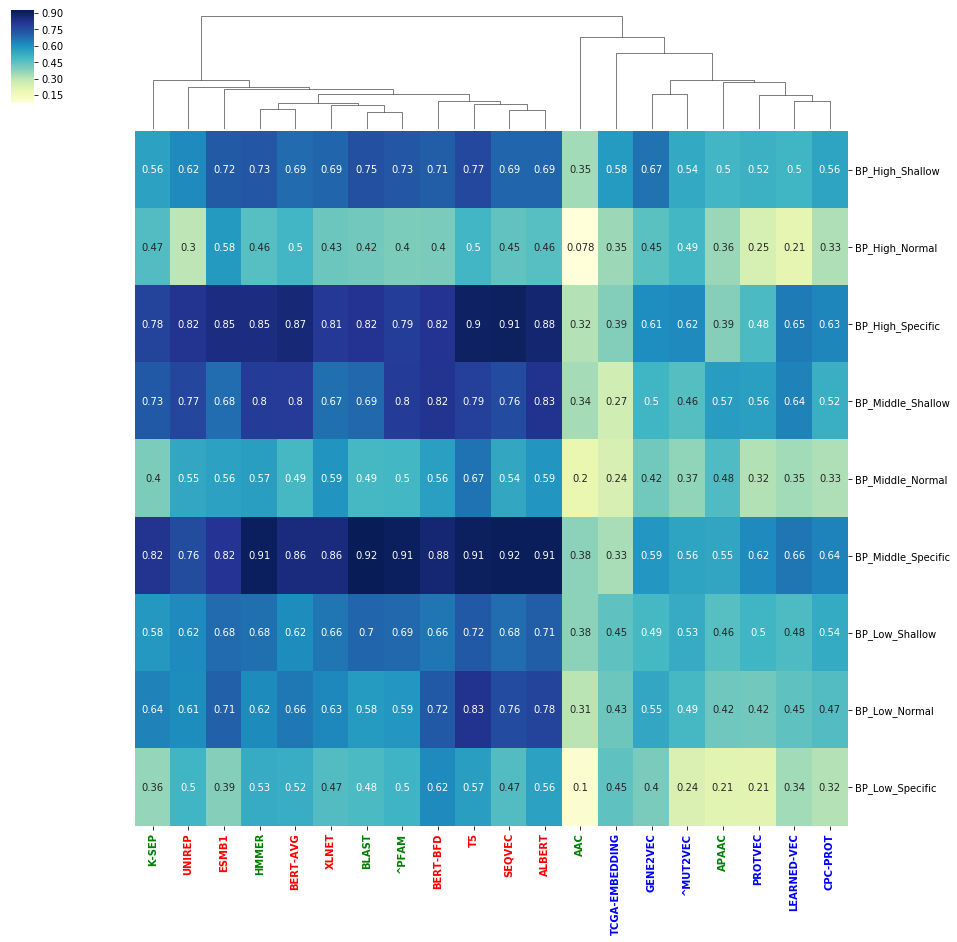

In [48]:
g = sns.clustermap(go_pred_tableF1_BP, annot=True, cmap="YlGnBu", row_cluster=False,figsize=(15, 15))
ax = g.ax_heatmap
ax.set_xlabel("")
ax.set_ylabel("")
set_colors_and_marks_for_representation_groups(ax)

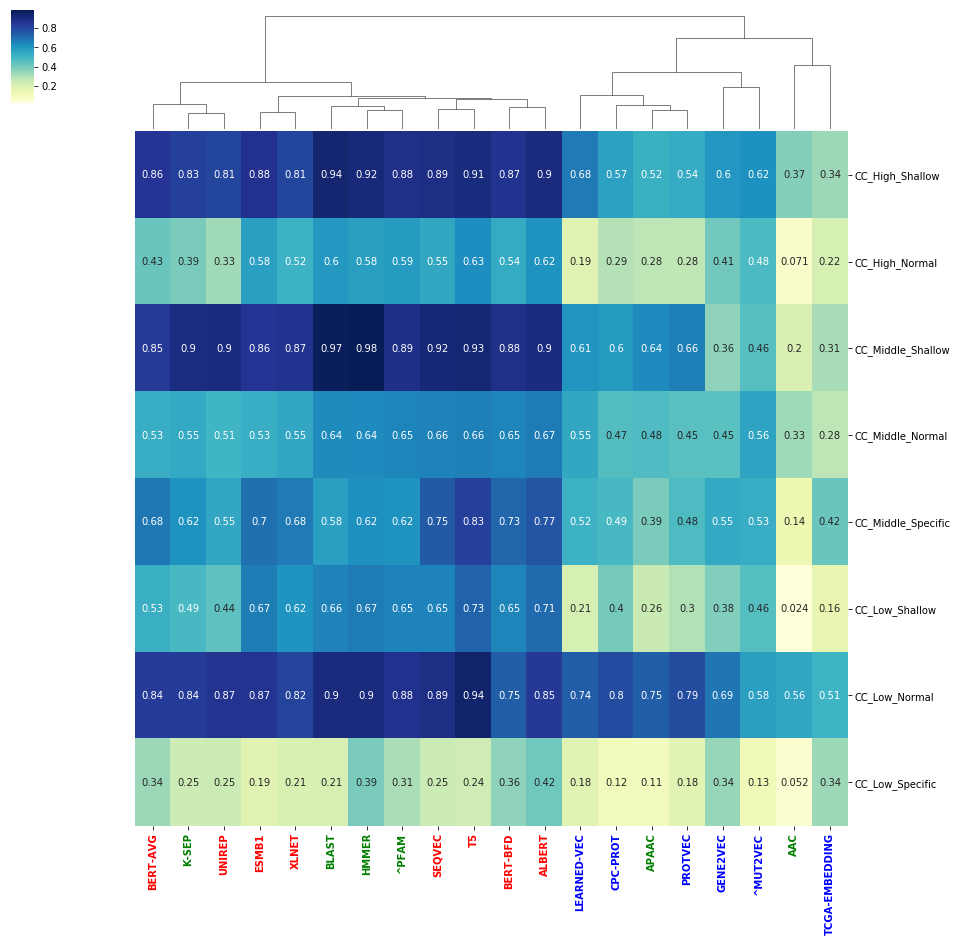

In [49]:
g = sns.clustermap(go_pred_tableF1_CC, annot=True, cmap="YlGnBu", row_cluster=False,figsize=(15, 15))
ax = g.ax_heatmap
ax.set_xlabel("")
ax.set_ylabel("")
set_colors_and_marks_for_representation_groups(ax)